# Area of a circle
## Using Monte-Carlo integration

### Christian Holm Christensen

We want to estimate the area of a circle by choosing random coordinates in $\mathbb{R}^2$ in a square with side-lengths twice the radius $r$ of the circle.  We determine in the point is inside or outside the circle by the inequality 

$$ \sqrt{x^2+y^2}\le r\quad,$$ 

or, equivalently

$$ x^2+y^2\le r^2\quad.$$

First, we import some packages 

In [1]:
import numpy as np 
import scipy.stats 
import matplotlib.pyplot as plt 

Next, we sample random coordinates in the range $[-r,+r]$ for both $x$ and $y$, and put the points _inside_ the circle in one array and those _outside_ the circle in another array 

In [2]:
N       = 100
r       = 5.2
p       = np.random.uniform(-r,r,size=(N,2))
inside  = np.array([(x,y) for x,y in p if x**2+y**2 <= r**2])
outside = np.array([(x,y) for x,y in p if x**2+y**2 > r**2])

Let us plot the points - green for inside, red for outside

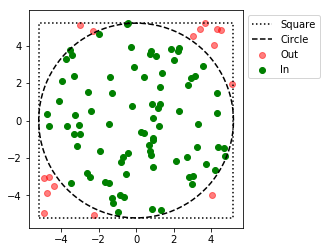

In [3]:
plt.plot([-r,r,r,-r,-r],[-r,-r,r,r,-r],':k',label='Square')
angs = np.linspace(0,2*np.pi,100)
plt.plot(r*np.cos(angs),r*np.sin(angs),'--k',label='Circle')

for s,c,l in zip([outside,inside],['r','g'],['Out','In']):
    plt.scatter(s[:,0],s[:,1],c=c,label=l,
                alpha=1 if c=='g' else .5)

plt.gca().set_aspect(1)
plt.legend(bbox_to_anchor=(1,1));

## Estimate of area 

The expectation value of the fraction $f$ of points that fall inside the circle to the total number is 

$$\mathrm{E}[f] = \frac{A_{\mathrm{circle}}}{A_{\mathrm{square}}}\quad,$$ 

where $A_{\mathrm{cirlce}}$ is what we are after, and $A_{\mathrm{square}}=(2r)^2$ is the area of the square.  Thus we have 

$$A_{\mathrm{circle}} = 4r^2 \mathrm{E}[f]\quad.$$

Let us calculate this 

In [4]:
Ninside  = len(inside)
Noutside = len(outside)
Ntotal   = Ninside + Noutside 
f        = Ninside / Ntotal 
area     = 4*r**2*f 
print(f'The estimated area is {area:.3f} (compare to {np.pi*r**2:.3f})')

The estimated area is 90.854 (compare to 84.949)


## Repeated trials 

We want to repeat the experiment several times, so we define a function that will estimate the area given some number of trial points 

In [5]:
def throws2area(n=N,r=r):
    nIn = np.add.reduce([x**2+y**2<r**2 for x,y in 
                         np.random.uniform(-r,r,size=(n,2))])
    return nIn/n*r**2*4

Let us run this trial several times over and the distribution of the estimates 

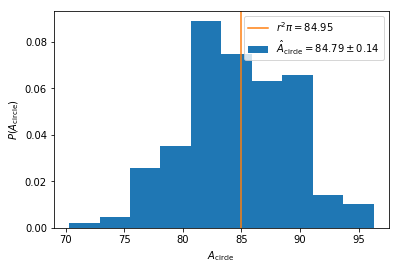

In [6]:
s = np.array([throws2area() for _ in range(1000)])
plt.hist(s,density=True,
         label=r'$\hat{{A}}_{{\mathrm{{circle}}}}={:.2f}\pm{:.2f}$'
        .format(s.mean(),s.std()/np.sqrt(len(s))));
plt.xlabel(r'$A_{\mathrm{circle}}$')
plt.ylabel(r'$P(A_{\mathrm{circle}})$')
plt.axvline(r**2*np.pi,label=r'$r^2\pi={:.2f}$'
            .format(r**2*np.pi),color='tab:orange')
plt.legend();

## Estimate of $\pi$

Now, let us the knowledge that

$$A_{\mathrm{circle}} = r^2\pi\quad,$$ 

to estimate the value of $\pi$ by 

\begin{align*}
  A_{\mathrm{circle}} &= 4r^2\mathrm{E}[f] = r^2\pi\\
  \pi &= \frac{A_{\mathrm{circle}}}{r^2} = 4\mathrm{E}[f]\quad.
\end{align*}

Again, we write a simple function to perform this estimate from a sample of $N$ points 

In [7]:
def throws2pi(n=N,r=r):
    nIn = np.add.reduce([x**2+y**2<r**2 for x,y in 
                         np.random.uniform(-r,r,size=(n,2))])
    return nIn / n * 4

We evaluate this for some values of $N$

In [8]:
for n in np.logspace(2,5,4):
    nn = int(n)
    print(f'N={nn:6d} -> pi={throws2pi(nn)}')

N=   100 -> pi=3.36
N=  1000 -> pi=3.016
N= 10000 -> pi=3.158
N=100000 -> pi=3.1344


Not great, but we get an idea that the more points we sample, the better the agreement.   Let us plot the estimate of $\pi$ as a function of number of points 

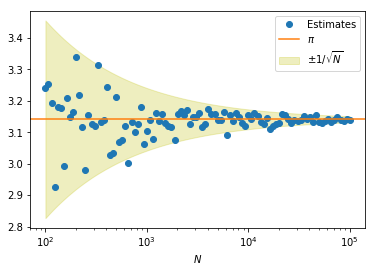

In [9]:
n = np.logspace(2,5,100)
plt.plot(n,[throws2pi(int(nn)) for nn in n],'o',label='Estimates')
plt.fill_between(n,
                 np.pi*(1+1/np.sqrt(n)),
                 np.pi*(1-1/np.sqrt(n)),
                alpha=0.25,color='y',label=r'$\pm1/\sqrt{N}$')
plt.axhline(np.pi,label=r'$\pi$',color='tab:orange')
plt.xscale('log')
plt.xlabel(r'$N$')
plt.legend();

The plot above tells us that we can improve the _precision_ of our estimate by increasing the number of samples.  The shaded band illustrates the expected improvement in precision, and we see that our estimates follow this trend.  

For more see [this note](https://cholmcc.gitlab.io/nbi-python/statistics#Lecture). 

## Law of great numbers - or - the central limit theorem 

As we did for the area above, we generate a sample of estimates of $\pi$, and find the distribution of these estimates.  The central limit theorem basically states, that if we make enough samples, then the distribution should approach a normal distribution.  Let us see that in action 

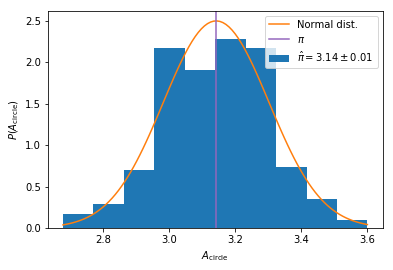

In [10]:
s = np.array([throws2pi() for _ in range(1000)])
m = s.mean()
sem = s.std()/np.sqrt(len(s))
print()
plt.hist(s,density=True,
         label=r'$\hat{{\pi}}={:.2f}\pm{:.2f}$'.format(m,sem));
x = np.linspace(s.min(),s.max(),100)
sig = s.std()
plt.plot(x,scipy.stats.norm.pdf(x,loc=m,scale=sig),
         label='Normal dist.')
plt.xlabel(r'$A_{\mathrm{circle}}$')
plt.ylabel(r'$P(A_{\mathrm{circle}})$')
plt.axvline(np.pi,label=r'$\pi$',color='tab:purple')
plt.legend();